
# 代码
## 获取数据

In [ ]:
# 训练集和测试集
! unzip data/data168245/Train.zip
! unzip data/data168245/Test_A.zip

In [1]:
# 将数据写入txt
import os
with open('train.txt','w') as f:
    for item in os.listdir('Train'):
        if '.pkl' in item:
            f.write('Train/'+item+'\n')
with open('test_A.txt','w') as f:
    for item in os.listdir('Test_A'):
        if '.pkl' in item:
            f.write('Test_A/'+item+'\n')

In [ ]:
##训练集
import os
import pandas as pd
import pickle
#n = int(input()) #set 
def create_df(label = 1,n=100,mode = True):
    if label == 1:
      fp = open("train_positive.txt","r")
    elif label == 0:
      fp = open("train_negative.txt","r")
    elif label ==2:  # 使用训练集
      fp = open("train.txt","r")
    elif label ==3:
      fp = open("test_A.txt","r")

    df_final = pd.DataFrame()
    for i in range(n):
        #print(fp.readline().strip())
        file_name = fp.readline().strip()
        with open(file_name, 'rb') as f:
          pkl_data = pickle.load(f)
        index = [str(file_name[6:-4])]* 256
        columns = ['volt','current','soc','max_single_volt','min_single_volt','max_temp','min_temp','time']
        df = pd.DataFrame(data=pkl_data[0], index=index, columns=columns) # dtype='float'
        df["mileage"] = pkl_data[1]['mileage']
        if not mode:
            label = pkl_data[1]['label']
            if label == '10':
                df["label"] = 1
            else:
                df["label"]  = 0
        
        df_final = df_final.append(df)
    return df_final

# 创建训练集DataFrame
df_train= create_df(label = 2,n= 28388, mode=True)
df_train.to_pickle('data.pkl')
    

In [9]:
## 创建测试集DataFrame
import os
import pandas as pd
import pickle

def create_df(label = 1,n=100,mode = True):
    if label == 1:
      fp = open("train_positive.txt","r")
    elif label == 0:
      fp = open("train_negative.txt","r")
    elif label ==2:
      fp = open("train.txt","r")
    elif label ==3:
      fp = open("test_A.txt","r")

    df_final = pd.DataFrame()
    for i in range(n):
        #print(fp.readline().strip())
        file_name = fp.readline().strip()
        with open(file_name, 'rb') as f:
          pkl_data = pickle.load(f)
        index = [str(file_name[7:-4])]* 256   ## test 的 id从 7 开始
        columns = ['volt','current','soc','max_single_volt','min_single_volt','max_temp','min_temp','time']
        df = pd.DataFrame(data=pkl_data[0], index=index, columns=columns) # dtype='float'
        df["mileage"] = pkl_data[1]['mileage']
        if not mode:
            label = pkl_data[1]['label']
            if label == '10':
                df["label"] = 1
            else:
                df["label"]  = 0
        
        df_final = df_final.append(df)
    return df_final
    
df_test= create_df(label = 3,n= 6234, mode=True)

In [11]:
df_test

,volt,current,soc,max_single_volt,min_single_volt,max_temp,min_temp,time,mileage
0,162.2,-4.6,54.6,1.806,1.794,168.0,156.0,9751.0,3983.8
0,162.2,-4.6,54.6,1.806,1.794,168.0,156.0,9752.0,3983.8
0,162.2,-4.6,54.6,1.806,1.794,168.0,156.0,9753.0,3983.8
0,162.2,-4.6,54.6,1.806,1.794,168.0,156.0,9754.0,3983.8
0,162.2,-4.6,54.6,1.806,1.794,168.0,156.0,9755.0,3983.8
...,...,...,...,...,...,...,...,...,...
9999,158.4,-4.0,45.7,1.762,1.749,126.0,108.0,6750.0,1628.8
9999,158.4,-4.0,45.7,1.762,1.748,126.0,108.0,6751.0,1628.8
9999,158.4,-4.0,45.7,1.762,1.749,126.0,108.0,6753.0,1628.8
9999,158.4,-4.0,45.7,1.762,1.748,126.0,108.0,6754.0,1628.8


In [12]:
df_test['id']=df_test.index
df_test.to_pickle('testdata.pkl')

## 读取数据

In [6]:
import pandas as pd
data = pd.read_pickle('data.pkl')

In [4]:
data

,volt,current,soc,max_single_volt,min_single_volt,max_temp,min_temp,time,mileage,label
7233,164.4,-26.2,50.2,1.831,1.824,204.0,198.0,5256.0,6313.0,0
7233,164.4,-26.4,50.2,1.831,1.824,204.0,198.0,5257.0,6313.0,0
7233,164.4,-26.4,50.2,1.831,1.824,204.0,198.0,5258.0,6313.0,0
7233,164.4,-26.4,50.2,1.831,1.823,204.0,198.0,5259.0,6313.0,0
7233,164.3,-26.1,50.2,1.831,1.823,204.0,198.0,5260.0,6313.0,0
...,...,...,...,...,...,...,...,...,...,...
21735,164.9,-5.8,57.8,1.835,1.825,138.0,126.0,3738.0,3366.0,0
21735,164.9,-5.8,57.8,1.835,1.825,138.0,126.0,3739.0,3366.0,0
21735,164.9,-5.8,57.8,1.835,1.826,138.0,126.0,3740.0,3366.0,0
21735,164.9,-5.8,57.8,1.835,1.825,138.0,126.0,3741.0,3366.0,0


In [2]:
data['id']=data.index

In [3]:
data.sort_values(['id'], ascending=True)

,volt,current,soc,max_single_volt,min_single_volt,max_temp,min_temp,time,mileage,label,id
0,160.3,-11.1,40.6,1.784,1.766,96.0,84.0,6539.0,2445.3,0,0
0,160.5,-11.1,41.3,1.786,1.769,96.0,84.0,6719.0,2445.3,0,0
0,160.6,-11.1,41.3,1.786,1.769,96.0,84.0,6720.0,2445.3,0,0
0,160.6,-11.1,41.3,1.787,1.769,96.0,84.0,6721.0,2445.3,0,0
0,160.6,-11.1,41.3,1.787,1.770,96.0,84.0,6722.0,2445.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9999,150.6,-5.0,26.0,1.675,1.671,186.0,162.0,3328.0,4953.9,0,9999
9999,150.6,-5.0,26.0,1.675,1.671,186.0,162.0,3338.0,4953.9,0,9999
9999,150.6,-5.0,26.0,1.675,1.671,186.0,162.0,3348.0,4953.9,0,9999
9999,150.7,-5.0,26.7,1.677,1.672,186.0,162.0,3797.0,4953.9,0,9999


In [6]:
a = []
for i in range(0,len(data),256):
    a.append(i)
y  = data.iloc[a]['label']
y.sort_index(inplace=True)
y
y.to_pickle('label.pkl')

0       0
1       0
10      0
100     1
1000    0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: label, Length: 28388, dtype: int64

In [5]:
data = data.drop(columns="label")

In [ ]:
# 安装tsfresh 特征提取工具
!pip install tsfresh

In [ ]:
## 第二种提取特征方法
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import EfficientFCParameters

# settings = EfficientFCParameters()

# 同时执行提取、和过滤：tsfresh.extract_relevant_features()

from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(data,y, column_id='id', column_sort='time',ml_task='classification')
features_filtered_direct.shape

In [2]:
import pandas as pd
features_filtered_direct=pd.read_pickle('features_filtered_direct.pkl')
features_filtered_direct

,"min_temp__cwt_coefficients__coeff_2__w_5__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_4__w_20__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_4__w_10__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_4__w_2__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_3__w_20__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_3__w_10__widths_(2, 5, 10, 20)","mileage__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_3__w_5__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_2__w_20__widths_(2, 5, 10, 20)",...,current__longest_strike_below_mean,"volt__fft_coefficient__attr_""angle""__coeff_38",current__index_mass_quantile__q_0.3,"current__fft_coefficient__attr_""angle""__coeff_3","current__fft_coefficient__attr_""angle""__coeff_52",min_single_volt__large_standard_deviation__r_0.30000000000000004,soc__percentage_of_reoccurring_values_to_all_values,"min_temp__fft_coefficient__attr_""imag""__coeff_80","current__fft_coefficient__attr_""angle""__coeff_16","min_temp__fft_coefficient__attr_""angle""__coeff_80"
0,60.442974,63.899196,85.175292,95.014046,27.579351,48.347138,66.159790,2765.926744,82.008032,32.435539,...,28.0,107.487154,0.300781,133.104476,148.932096,1.0,1.0,0.0,36.346520,0.0
1,151.107434,159.747990,212.938229,237.535115,68.948377,120.867845,165.399476,8646.617514,205.020080,81.088847,...,2.0,126.870242,0.300781,-42.794818,106.368007,0.0,1.0,0.0,39.077921,0.0
10,138.155369,146.055306,194.686381,217.174962,63.038516,110.507744,151.222378,1635.712045,187.446930,74.138374,...,61.0,93.048158,0.300781,-69.198907,163.144142,0.0,1.0,0.0,-0.040173,0.0
100,133.838013,141.491077,188.602431,210.388245,61.068562,107.054377,146.496679,9462.267854,181.589214,71.821550,...,2.0,135.586248,0.300781,-133.590781,-61.790571,0.0,1.0,0.0,107.285530,0.0
1000,129.520658,136.926849,182.518482,203.601527,59.098609,103.601010,141.770980,6228.623158,175.731497,69.504726,...,37.0,126.385383,0.304688,-28.804055,25.125887,0.0,1.0,0.0,-172.619508,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.904132,27.385370,36.503696,40.720305,11.819722,20.720202,28.354196,3659.171887,35.146299,13.900945,...,0.0,109.430828,0.300781,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
9996,151.107434,159.747990,212.938229,237.535115,68.948377,120.867845,165.399476,0.000000,205.020080,81.088847,...,165.0,151.892541,0.296875,-7.054221,-85.738070,0.0,1.0,0.0,-160.219878,0.0
9997,116.568592,123.234164,164.266634,183.241374,53.188748,93.240909,127.593882,11125.805441,158.158348,62.554253,...,218.0,107.163279,0.300781,-44.105657,-123.372356,1.0,1.0,0.0,-46.246196,0.0
9998,116.568592,123.234164,164.266634,183.241374,53.188748,93.240909,127.593882,2150.484573,158.158348,62.554253,...,70.0,85.943486,0.300781,66.084969,52.977872,0.0,1.0,0.0,-42.481697,0.0


## 特征筛选

In [3]:
## 原来4865个特征
features_filtered_direct

,"min_temp__cwt_coefficients__coeff_2__w_5__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_4__w_20__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_4__w_10__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_4__w_2__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_3__w_20__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_3__w_10__widths_(2, 5, 10, 20)","mileage__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_3__w_5__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_2__w_20__widths_(2, 5, 10, 20)",...,current__longest_strike_below_mean,"volt__fft_coefficient__attr_""angle""__coeff_38",current__index_mass_quantile__q_0.3,"current__fft_coefficient__attr_""angle""__coeff_3","current__fft_coefficient__attr_""angle""__coeff_52",min_single_volt__large_standard_deviation__r_0.30000000000000004,soc__percentage_of_reoccurring_values_to_all_values,"min_temp__fft_coefficient__attr_""imag""__coeff_80","current__fft_coefficient__attr_""angle""__coeff_16","min_temp__fft_coefficient__attr_""angle""__coeff_80"
0,60.442974,63.899196,85.175292,95.014046,27.579351,48.347138,66.159790,2765.926744,82.008032,32.435539,...,28.0,107.487154,0.300781,133.104476,148.932096,1.0,1.0,0.0,36.346520,0.0
1,151.107434,159.747990,212.938229,237.535115,68.948377,120.867845,165.399476,8646.617514,205.020080,81.088847,...,2.0,126.870242,0.300781,-42.794818,106.368007,0.0,1.0,0.0,39.077921,0.0
10,138.155369,146.055306,194.686381,217.174962,63.038516,110.507744,151.222378,1635.712045,187.446930,74.138374,...,61.0,93.048158,0.300781,-69.198907,163.144142,0.0,1.0,0.0,-0.040173,0.0
100,133.838013,141.491077,188.602431,210.388245,61.068562,107.054377,146.496679,9462.267854,181.589214,71.821550,...,2.0,135.586248,0.300781,-133.590781,-61.790571,0.0,1.0,0.0,107.285530,0.0
1000,129.520658,136.926849,182.518482,203.601527,59.098609,103.601010,141.770980,6228.623158,175.731497,69.504726,...,37.0,126.385383,0.304688,-28.804055,25.125887,0.0,1.0,0.0,-172.619508,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.904132,27.385370,36.503696,40.720305,11.819722,20.720202,28.354196,3659.171887,35.146299,13.900945,...,0.0,109.430828,0.300781,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
9996,151.107434,159.747990,212.938229,237.535115,68.948377,120.867845,165.399476,0.000000,205.020080,81.088847,...,165.0,151.892541,0.296875,-7.054221,-85.738070,0.0,1.0,0.0,-160.219878,0.0
9997,116.568592,123.234164,164.266634,183.241374,53.188748,93.240909,127.593882,11125.805441,158.158348,62.554253,...,218.0,107.163279,0.300781,-44.105657,-123.372356,1.0,1.0,0.0,-46.246196,0.0
9998,116.568592,123.234164,164.266634,183.241374,53.188748,93.240909,127.593882,2150.484573,158.158348,62.554253,...,70.0,85.943486,0.300781,66.084969,52.977872,0.0,1.0,0.0,-42.481697,0.0


In [ ]:
!pip install feature-selector

In [15]:
from feature_selector import FeatureSelector
# 创建 feature-selector 实例，并传入features 和labels
fs = FeatureSelector(data=features_filtered_direct, labels=y)

0 features with greater than 0.60 missing values.



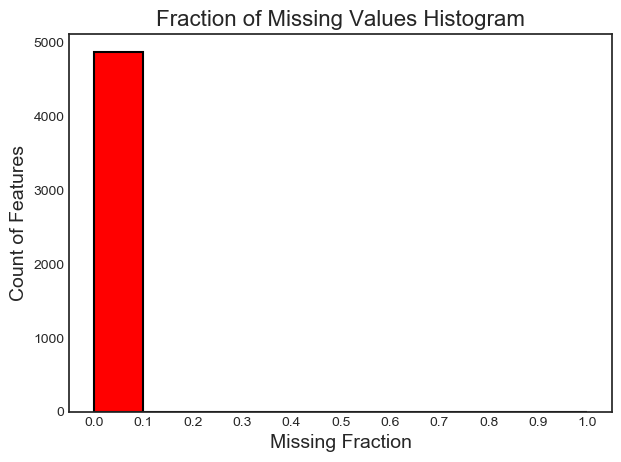

In [8]:
# 选择出missing value 百分比大于60%的特征
fs.identify_missing(missing_threshold=0.6)

# 查看选择出的特征
fs.ops['missing']

# 绘制所有特征missing value百分比的直方图
fs.plot_missing()

In [9]:
# 不对feature进行one-hot encoding（默认为False）, 然后选择出相关性大于98%的feature, 
fs.identify_collinear(correlation_threshold=0.98, one_hot=False)

# 查看选择的feature
fs.ops['collinear']

# 绘制选择的特征的相关性heatmap
fs.plot_collinear()

# 绘制所有特征的相关性heatmap

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[514]	valid_0's auc: 0.999907
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[559]	valid_0's auc: 0.999868
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[510]	valid_0's auc: 0.999848
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[821]	valid_0's auc: 0.999918
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[529]	valid_0's auc: 0.999897
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[765]	valid_0's auc: 0.999884
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[613]	valid_0's auc: 0.999895
Training until validation scores don't improve for 100 rounds.
Early s

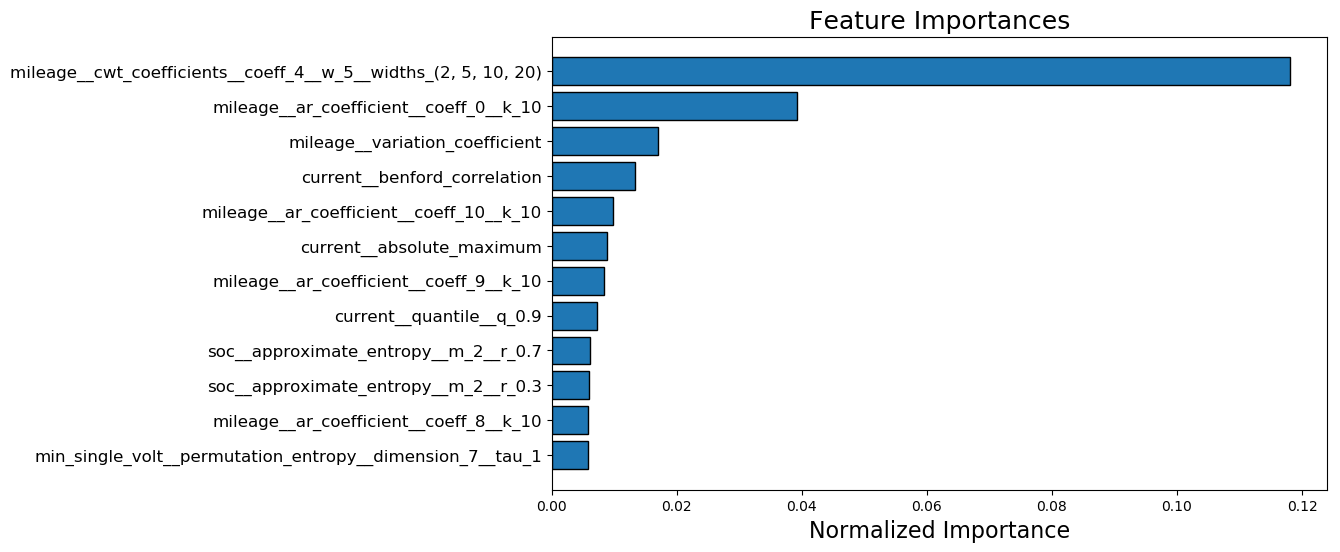

C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


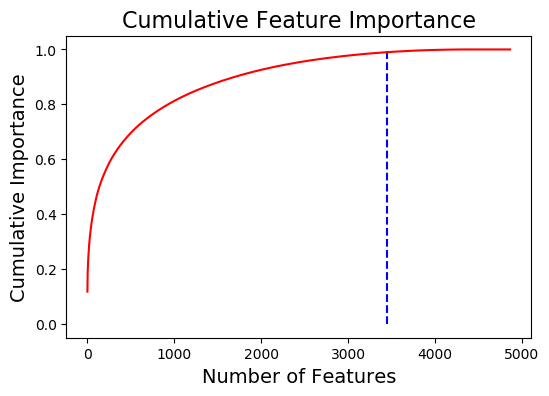

3446 features required for 0.99 of cumulative importance


In [16]:
fs.identify_zero_importance(task='classification',
                                             eval_metric='auc',
                                             n_iterations=20,
                                             early_stopping=True)


# 查看选择出的zero importance feature
fs.ops['zero_importance']

# 绘制feature importance 关系图
# 参数说明：
#          plot_n: 指定绘制前plot_n个最重要的feature的归一化importance条形图，如图4所示
#          threshold: 指定importance分数累积和的阈值，用于指定图4中的蓝色虚线.
#              蓝色虚线指定了importance累积和达到threshold时，所需要的feature个数。
#              注意：在计算importance累积和之前，对feature列表安装feature importance的大小
#                   进行了降序排序
# 
#      
fs.plot_feature_importances(threshold=0.99, plot_n=12)

In [8]:
# 选择出对importance累积和达到99%没有贡献的feature
fs.identify_low_importance(cumulative_importance=0.99)

# 查看选择出的feature
fs.ops['low_importance']

3291 features required for cumulative importance of 0.99 after one hot encoding.
1574 features do not contribute to cumulative importance of 0.99.



['volt__energy_ratio_by_chunks__num_segments_10__segment_focus_7',
 'min_single_volt__change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.0',
 'soc__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.4',
 'max_single_volt__fft_coefficient__attr_"abs"__coeff_17',
 'volt__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.4',
 'volt__energy_ratio_by_chunks__num_segments_10__segment_focus_8',
 'soc__linear_trend__attr_"slope"',
 'current__number_peaks__n_10',
 'current__fft_aggregated__aggtype_"centroid"',
 'min_temp__variation_coefficient',
 'volt__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.4',
 'min_temp__quantile__q_0.2',
 'max_single_volt__linear_trend__attr_"rvalue"',
 'min_single_volt__first_location_of_minimum',
 'current__fft_coefficient__attr_"abs"__coeff_57',
 'current__fft_coefficient__attr_"abs"__coeff_80',
 'max_temp__benford_correlation',
 'current__fft_coefficient__attr_"abs"__coeff_54',
 'max_single_volt__fft_coefficient__attr_"imag"__coeff_

0 features with a single unique value.



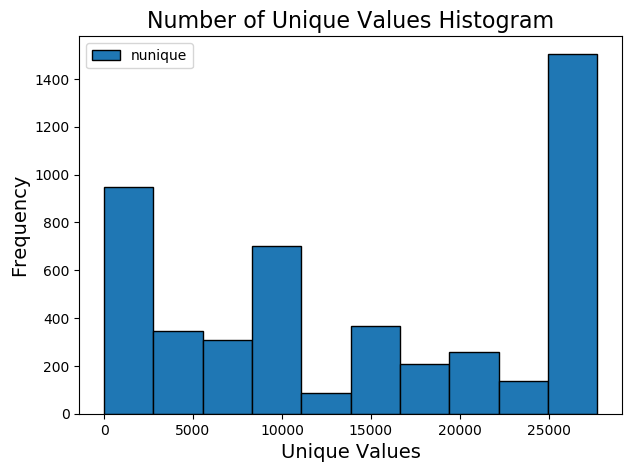

In [9]:
# 选择出只有单个值的feature
fs.identify_single_unique()

# 查看选择出的feature
fs.ops['single_unique']

#绘制所有feature unique value的直方图
fs.plot_unique()

In [10]:
# 去除所有类型的特征
#    参数说明：
#       methods: 
#               desc:  需要去除哪些类型的特征
#               type:  string / list-like object
#             values:  'all' 或者是 ['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance']
#                      中多个方法名的组合
#      keep_one_hot: 
#              desc: 是否需要保留one-hot encoding的特征
#              type: boolean
#              values: True/False
#              default: True
train_removed = fs.remove(methods = 'all', keep_one_hot=False)

['zero_importance', 'low_importance', 'single_unique'] methods have been run

Removed 1574 features including one-hot features.


In [30]:
train_removed.iloc[:3,:].to_pickle('train_removed.pkl') #只需要存一点

In [23]:
train_removed

,"mileage__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_2__w_20__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_7__w_2__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_6__w_2__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_1__w_20__widths_(2, 5, 10, 20)",min_temp__c3__lag_2,min_temp__absolute_maximum,"min_temp__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","min_temp__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)",...,"min_temp__fft_coefficient__attr_""imag""__coeff_71","min_temp__fft_coefficient__attr_""angle""__coeff_71","max_temp__fft_coefficient__attr_""imag""__coeff_98",current__longest_strike_below_mean,"volt__fft_coefficient__attr_""angle""__coeff_38","current__fft_coefficient__attr_""angle""__coeff_3","current__fft_coefficient__attr_""angle""__coeff_52","min_temp__fft_coefficient__attr_""imag""__coeff_80","current__fft_coefficient__attr_""angle""__coeff_16","min_temp__fft_coefficient__attr_""angle""__coeff_80"
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
10,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
100,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1000,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
### 存储缩减特征配置，最后剩下3291个特征。
import tsfresh
import numpy as np
removed_parameters_setting = tsfresh.feature_extraction.settings.from_columns(train_removed.columns) 
# np.save('./removed_parameters.npy', removed_parameters)
# removed_parameters 

In [ ]:
## 提取训练集特征,使用removed_parameters_setting
from tsfresh import extract_features, extract_relevant_features, select_features
extracted_train_features = extract_features(data,  column_id='id', column_sort='time', disable_progressbar=True,kind_to_fc_parameters=removed_parameters_setting ,chunksize=1)
extracted_train_features

In [ ]:
## 提取测试集特征,使用removed_parameters_setting
extracted_test_features = extract_features(testdata,  column_id='id', column_sort='time', disable_progressbar=True,
 kind_to_fc_parameters=removed_parameters_setting ,chunksize=1)
extracted_test_features

In [9]:

import pandas as pd
extracted_train_features=pd.read_pickle('extracted_train_features.pkl')
extracted_train_features
y = pd.read_pickle('label.pkl')
y

### 数据增强，最后证明RandomOverSampler方法最好！

In [ ]:
from imblearn.over_sampling import RandomOverSampler  
from collections import Counter
smt = RandomOverSampler(random_state=42)
X_resampled, y_resampled = smt.fit_resample(features_filtered_direct, y)
print(sorted(Counter(y_resampled).items()))

X_resampled.shape, y_resampled.shape

In [ ]:
## 导入LightGBM模型
from lightgbm.sklearn import LGBMClassifier
import re
## 定义 LightGBM 模型 
clf = LGBMClassifier()
# 在训练集上训练LightGBM模型
X_resampled.columns = [re.sub('[^A-Za-z0-9]+', '', col) for col in X_resampled.columns] 

clf.fit(X_resampled, y_resampled)

In [ ]:
# 成绩0.86！！
testdata = pd.read_pickle('extracted_test_features.pkl')
testdata.columns = [re.sub('[^A-Za-z0-9]+', '', col) for col in testdata.columns] 
predict = clf.predict_proba(testdata)
print(predict)

##id 要对上！！！！！
result_csv = pd.read_csv('result.csv')
result_csv['file_name']=testdata.index+'.pkl'
result_csv['score']= predict[:,-1]
result_csv.to_csv('result_lgm.csv',index=None)  # 在result文件夹下

## automl 效果提升很少

In [4]:
!pip install mljar-supervised

In [ ]:
import numpy as np
from supervised import AutoML
y = pd.Series(y_resampled.values, index=y_resampled.index)
y
automl_mljar = AutoML(mode="Compete", features_selection=True,total_time_limit=10000,
results_path= './OUTPUT/best/mljar_compete4',random_state=2022)
automl_mljar.fit(X_resampled, y)

Linear algorithm was disabled.
AutoML directory: ./OUTPUT/best/mljar_compete4
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree logloss 0.159555 trained in 42.65 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 5-fold CV Shuffle,Stratify
* Step simple_algorithms will try to check up to 3 models
1_DecisionTree logloss 0.168049 trained in 182.91 seconds
2_DecisionTree logloss 0.214584 trained in 166.44 seconds
3_De

AutoML(features_selection=True, mode='Compete', random_state=2022,
       results_path='./OUTPUT/best/mljar_compete4', total_time_limit=10000)

In [ ]:
testdata = pd.read_pickle('extracted_test_features.pkl')
predict = automl_mljar.predict_proba(testdata)

##id 要对上！！！！！
result_csv = pd.read_csv('result.csv')
# result_csv['file_name']=testdata.index+'.pkl'
result_csv['score']= predict[:,-1]
result_csv.to_csv('result_automl_mljar.csv',index=None)  # 结果0.8637

## 模型结果融合 
效果提升一般，可能有利于泛化，B榜会好点

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import os
import csv
import pandas as pd
# result文件夹下的实验结果是使用不同特征数（lgm算法特征选择后的）得到的实验结果。
def all_csv(file_PATH = r'./result',save_file="融合.csv"):
    df_list = [] #创建新列表用来存储提取出来的列表
    tqdm=os.listdir(file_PATH)#文件夹中的文件列表
    for i in range(0,len(tqdm)):#逐次遍历文件夹下的文件
        files_path = os.path.join(file_PATH,tqdm[i])#对应文件夹下的某份文件
        df = pd.read_csv(files_path)##读取CSV文件数据
        if i ==0:
            data = df.iloc[:,:]
        else:
            data['score'] = (data['score']+data['score'])/(i+1)
       
    save_path=os.path.join(file_PATH,save_file)#定义保存存放整合后数据的路径
    data.to_csv(save_path,index=False)#将整合好的数据输入到新建的csv文件中



if __name__ == "__main__":
    all_csv(file_PATH = r'./result',save_file="融合.csv")


## 实验按比例融合得到结果
* 0.8639 : result_best * 0.9+result_a * 0.1
* 0.864 : result_best * 0.8+result_a * 0.2
* 0.864: result_best *0.75+result_a *0.25
* 0.8641 : result_best *0.7+result_a *0.3
* 0.8641: result_best *0.65+result_a *0.35
* 0.8641: result_best *0.6+result_a *0.4 


In [ ]:
result_best = pd.read_csv('result/result_automl_mljar(0.8637).csv')['score']
result_a = pd.read_csv('result/融合.csv')['score']
result_last = result_best*0.6+result_a*0.4
result = pd.read_csv('result/result_automl_mljar(0.8637).csv')
result['score']=result_last
result.to_csv('result/融合last(0.6,0.4).csv',index=None)  # 实验结果0.8641